 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [4]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [5]:
# Take sample of data
csv_path = Path(r"C:\Users\ikili\Downloads\monu-virt-fin-11-2021-u-c-master\Homework\Week 3\Starter_Code\Resources\whale_returns.csv")
whale_data = pd.read_csv(csv_path, index_col="Date",parse_dates=True, infer_datetime_format=True)

In [6]:
whale_data.sample(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2017-06-09,-0.011261,-0.000140,-0.014631,-0.033353
2016-06-21,-0.000260,-0.006424,0.001887,-0.007710
2018-01-17,0.008249,-0.002485,0.013650,0.008472
2015-12-08,-0.003351,-0.003540,-0.000812,-0.000835
2017-12-05,-0.005089,-0.004081,-0.011800,0.001915


In [7]:
# Reading whale returns
whale_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [8]:
whale_data.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702
2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833


In [9]:
# Count nulls

# Check for null values
whale_data.isnull()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,True,True,True,True
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


In [10]:
# Count null values
whale_data.isnull().count()

SOROS FUND MANAGEMENT LLC      1060
PAULSON & CO.INC.              1060
TIGER GLOBAL MANAGEMENT LLC    1060
BERKSHIRE HATHAWAY INC         1060
dtype: int64

In [11]:
# Drop nulls
whale_data = whale_data.dropna().copy()
whale_data

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [12]:
# Reading algorithmic returns
algo_path = Path(r"C:\Users\ikili\Downloads\monu-virt-fin-11-2021-u-c-master\Homework\Week 3\Starter_Code\Resources\algo_returns.csv")
algo_data = pd.read_csv(algo_path, index_col="Date",parse_dates=True, infer_datetime_format=True)

In [13]:
algo_data.sample(5)

,Algo 1,Algo 2
Date,,
2014-11-03,-0.005808,-0.001970
2018-11-20,-0.000246,-0.014343
2015-02-27,0.000399,-0.000447
2015-07-13,0.004215,0.008575
2016-07-13,-0.000398,-0.003027


In [14]:
algo_data.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [15]:
algo_data.tail()

,Algo 1,Algo 2
Date,,
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829
2019-04-30,-0.002944,-0.001570
2019-05-01,0.000094,-0.007358


In [16]:
# Count nulls

# Check for null values
algo_data.isnull()

,Algo 1,Algo 2
Date,,
2014-05-28,False,True
2014-05-29,False,True
2014-05-30,False,True
2014-06-02,False,True
2014-06-03,False,True
...,...,...
2019-04-25,False,False
2019-04-26,False,False
2019-04-29,False,False


In [17]:
# Count null values
algo_data.isnull().count()

Algo 1    1241
Algo 2    1241
dtype: int64

In [18]:
# Drop nulls
algo_data = algo_data.dropna().copy()
algo_data

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [19]:
# Reading S&P TSX 60 Closing Prices
SP_path = Path(r"C:\Users\ikili\Downloads\monu-virt-fin-11-2021-u-c-master\Homework\Week 3\Starter_Code\Resources\sp_tsx_history.csv")
SP_data = pd.read_csv(SP_path, index_col="Date",parse_dates=True, infer_datetime_format=True)

In [20]:
SP_data.sample(5)

,Close
Date,
2014-01-29,"$13,643.22"
2014-09-10,"$15,471.89"
2015-02-11,"$15,151.50"
2015-12-30,"$13,142.29"
2019-01-21,"$15,354.16"


In [21]:
SP_data.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [22]:
SP_data.tail()

,Close
Date,
2019-12-20,"$17,118.44"
2019-12-23,"$17,128.71"
2019-12-24,"$17,180.15"
2019-12-27,"$17,168.21"
2019-12-30,"$17,098.56"


In [23]:
# Check Data Types
SP_data.dtypes

Close    object
dtype: object

In [24]:
type(SP_data)

pandas.core.frame.DataFrame

In [25]:
SP_data.columns


Index(['Close'], dtype='object')

In [26]:
# Fix Data Types
#Have to convert close column into integer or float (numeric value for further plots)
#SP_data['Value']= SP_data.split('$')
SP_data['Close']=SP_data['Close'].astype(str)

In [27]:
### Method I: Using replace

In [28]:
SP_data["Close"]= SP_data["Close"].str.replace('$','')
SP_data["Close"]= SP_data["Close"].str.replace(',','')

<ipython-input-28-9b59755a3bb7>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  SP_data["Close"]= SP_data["Close"].str.replace('$','')


In [29]:
##SP_data

In [30]:
### Method II: Using Split

In [31]:
# Reading S&P TSX 60 Closing Prices
##SP_path = Path(r"C:\Users\ikili\Downloads\monu-virt-fin-11-2021-u-c-master\Homework\Week 3\Starter_Code\Resources\sp_tsx_history.csv")
##SP_data = pd.read_csv(SP_path, index_col="Date",parse_dates=True, infer_datetime_format=True)

In [32]:
#split columns
##SP_data=SP_data["Close"].str.split("$",expand= True)

In [33]:
##SP_data

In [34]:
##SP_data= SP_data.rename(columns={
##    "Date":"Date",
##    "Close":"Close"
##})

In [35]:
##SP_data.head()

In [36]:
#Chainging data type to float
SP_data['Close'] = SP_data['Close'].astype('float')

In [37]:
#To know the data type
SP_data['Close'].dtype

dtype('float64')

In [38]:
#Convert the S&P TSX 60 closing prices to daily returns.
# Calculate Daily Returns
SP_data.isnull().sum()
SP_data= SP_data.pct_change()
SP_data.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [39]:
# Drop nulls
SP_data.pct_change
SP_data.dropna(inplace=True)
SP_data.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [40]:
# Rename `Close` Column to be specific to this portfolio.
SP_data= SP_data.rename(columns={"Close":"SP_tsx"})
SP_data.head()

,SP_tsx
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [41]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_portfolios_df=pd.concat([whale_data,algo_data,SP_data], axis='columns',join='inner')

In [42]:
combined_portfolios_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_tsx
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


In [43]:
combined_portfolios_df.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_tsx
Date,,,,,,,
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702,-0.002944,-0.001570,-0.001183
2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833,0.000094,-0.007358,-0.004703


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

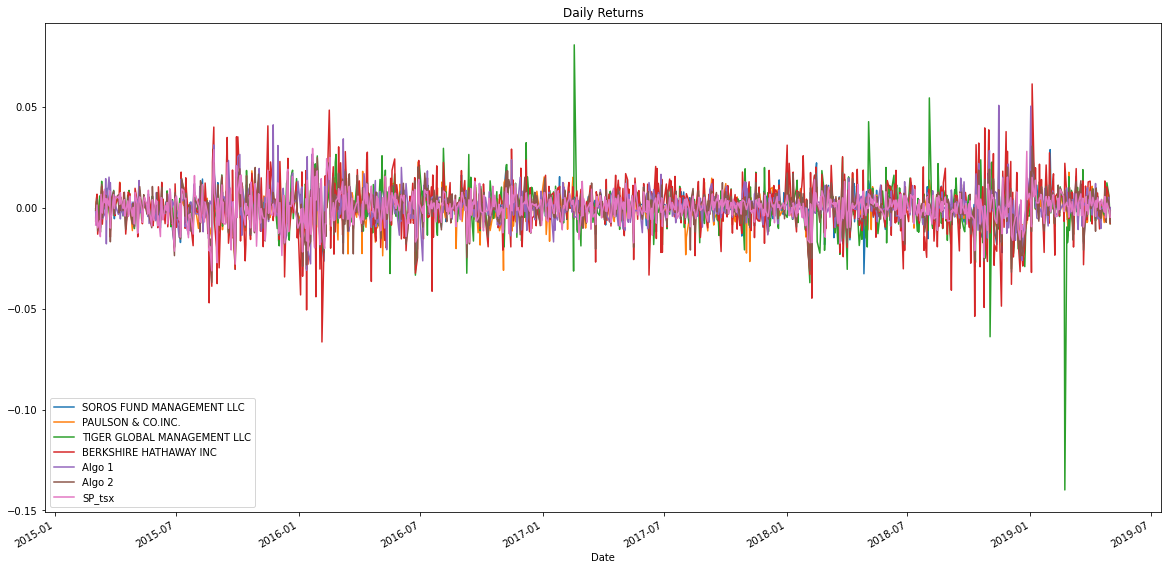

In [44]:
# Plot daily returns of all portfolios
combined_portfolios_df.plot( title="Daily Returns" , figsize=(20,10))

#### Calculate and Plot cumulative returns.

In [45]:
# Calculate cumulative returns of all portfolios
combined_portfolios_df_cumulative_returns = (1 + combined_portfolios_df).cumprod()
combined_portfolios_df_cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_tsx
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.991470
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.988128
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.989456
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.979589
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.973168


<AxesSubplot:xlabel='Date'>

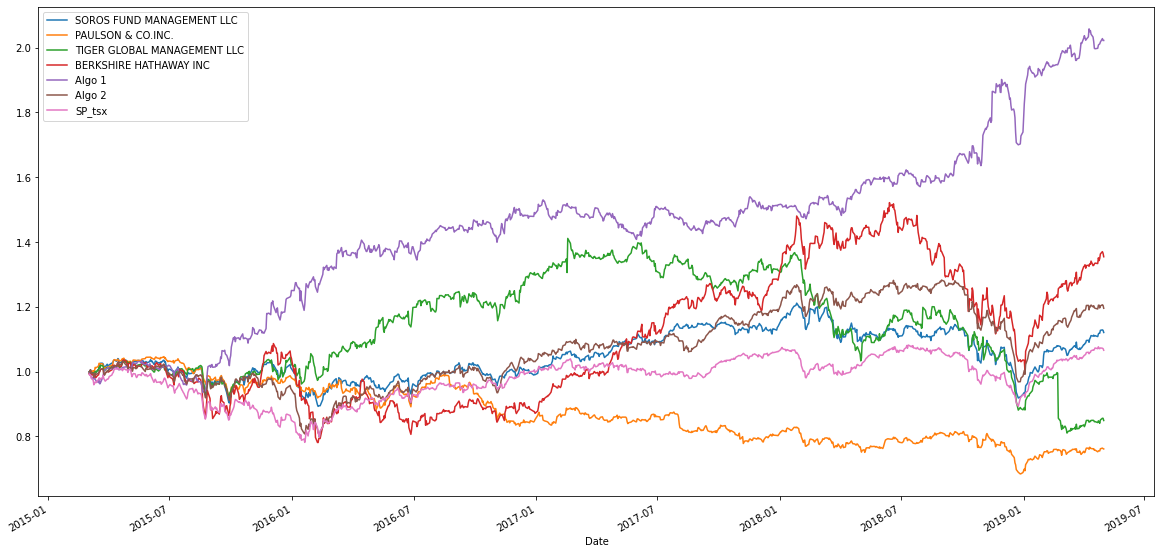

In [46]:
# Plot cumulative returns
combined_portfolios_df_cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Portfolio Risk Box Plot'}>

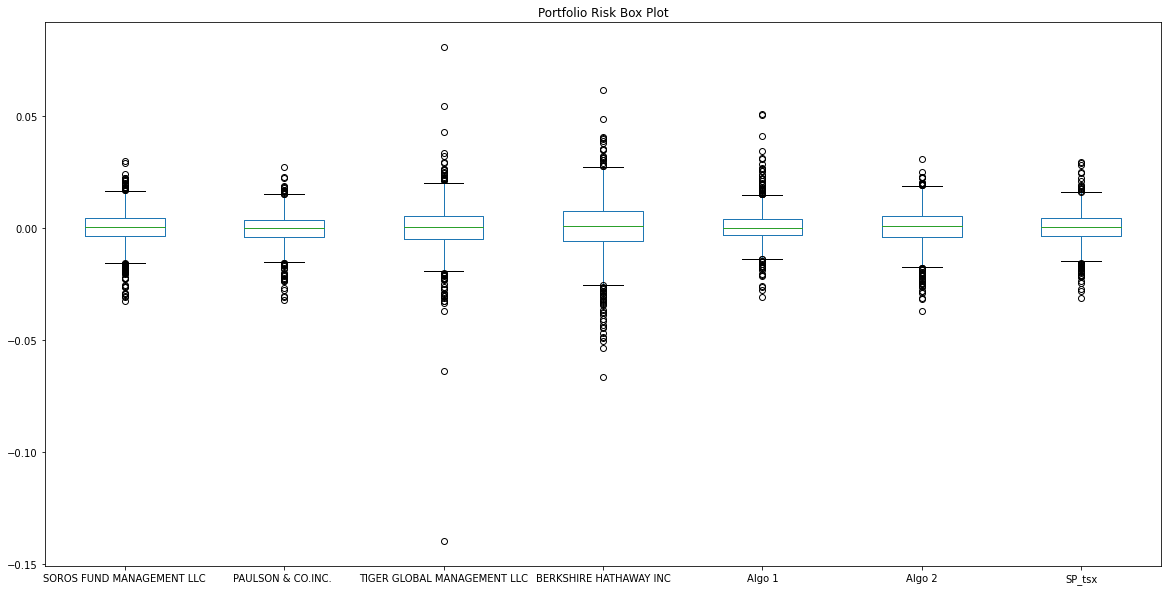

In [47]:
# Box plot to visually show risk
# Box plot is used tofind outliers
combined_portfolios_df.plot.box(title="Portfolio Risk Box Plot", figsize=(20,10))

### Calculate Standard Deviations

In [48]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_portfolios_df.std().sort_values(ascending=False) #in descending order; Standard deviation values
daily_std

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
SP_tsx                         0.007034
PAULSON & CO.INC.              0.006982
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [49]:
# Calculate  the daily standard deviation of S&P TSX 60
SP_std=SP_data.std().sort_values(ascending=False)
SP_std.head()

SP_tsx    0.006637
dtype: float64

In [50]:
# Determine which portfolios are riskier than the S&P TSX 60
portfolios_riskier_than_SP=[daily_std > daily_std['SP_tsx']]
portfolios_riskier_than_SP

[BERKSHIRE HATHAWAY INC          True
 TIGER GLOBAL MANAGEMENT LLC     True
 Algo 2                          True
 SOROS FUND MANAGEMENT LLC       True
 Algo 1                          True
 SP_tsx                         False
 PAULSON & CO.INC.              False
 dtype: bool]

### Calculate the Annualized Standard Deviation

In [51]:
# Calculate the annualized standard deviation (252 trading days)
ann_std=daily_std*np.sqrt(252)
ann_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120470
SP_tsx                         0.111664
PAULSON & CO.INC.              0.110841
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

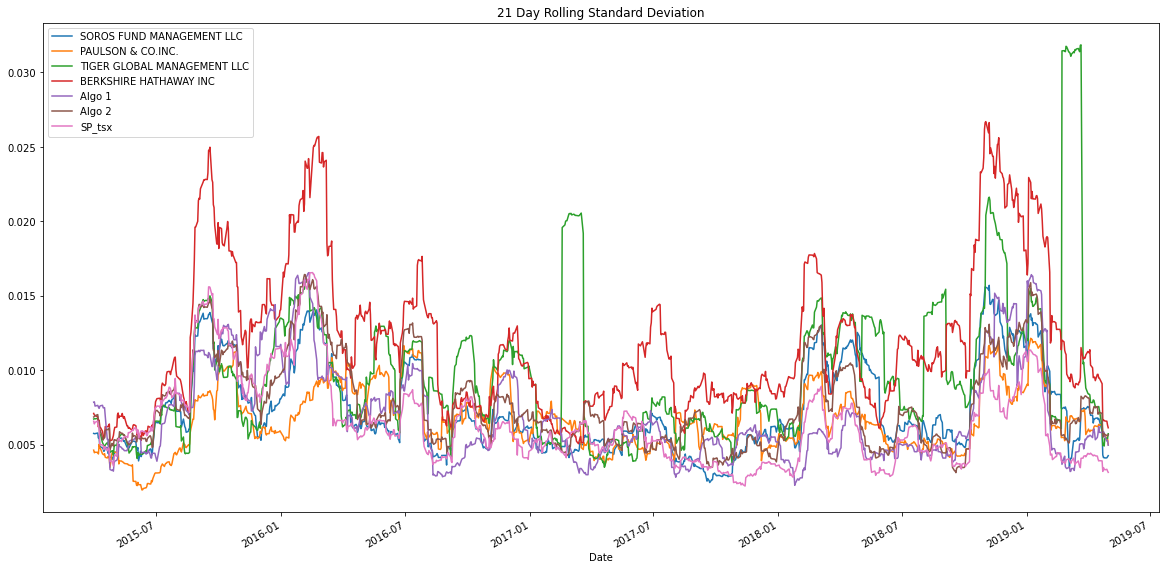

In [52]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

# Plot the rolling standard deviation
# Using a 21 trading day window (for combind datasets)
combined_portfolios_df.rolling(window=21).std().plot(title="21 Day Rolling Standard Deviation", figsize=(20,10))

### Calculate and plot the correlation

In [53]:
# Calculate the correlation
all_corr=combined_portfolios_df.corr()
# Display de correlation matrix
all_corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_tsx
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
SP_tsx,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

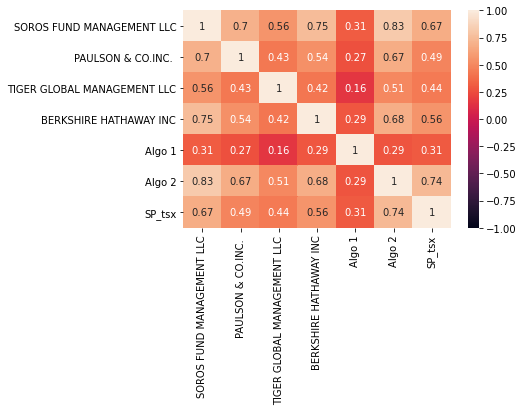

In [54]:
#Using heatmap to visualize correlation better
sns.heatmap(all_corr,  vmin=-1, vmax=1,annot=True)

In [56]:
combined_portfolios_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_tsx
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [57]:
# Calculate covariance of a single portfolio
#Chosen portfolio: Algo 2 V/s SP_tsx
# Calculate covariance of all daily returns vs. SP_tsx
algo_2_covariance = combined_portfolios_df['Algo 2'].rolling(window=60).cov(combined_portfolios_df['SP_tsx'])
algo_2_covariance


Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000015
2019-04-26    0.000015
2019-04-29    0.000015
2019-04-30    0.000015
2019-05-01    0.000015
Length: 1029, dtype: float64

In [58]:
#Removing nan values
algo_2_covariance = algo_2_covariance.dropna().copy()

In [59]:
algo_2_covariance

Date
2015-05-28    0.000022
2015-05-29    0.000022
2015-06-01    0.000022
2015-06-02    0.000022
2015-06-03    0.000021
                ...   
2019-04-25    0.000015
2019-04-26    0.000015
2019-04-29    0.000015
2019-04-30    0.000015
2019-05-01    0.000015
Length: 970, dtype: float64

In [61]:
# Calculate variance of all daily returns vs. S&P 500
variance = combined_portfolios_df['SP_tsx'].rolling(window=60).var()
variance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000015
2019-04-26    0.000015
2019-04-29    0.000015
2019-04-30    0.000015
2019-05-01    0.000015
Name: SP_tsx, Length: 1029, dtype: float64

In [62]:
#Removing nan values
variance = variance.dropna().copy()

In [63]:
variance

Date
2015-05-28    0.000032
2015-05-29    0.000032
2015-06-01    0.000032
2015-06-02    0.000032
2015-06-03    0.000030
                ...   
2019-04-25    0.000015
2019-04-26    0.000015
2019-04-29    0.000015
2019-04-30    0.000015
2019-05-01    0.000015
Name: SP_tsx, Length: 970, dtype: float64

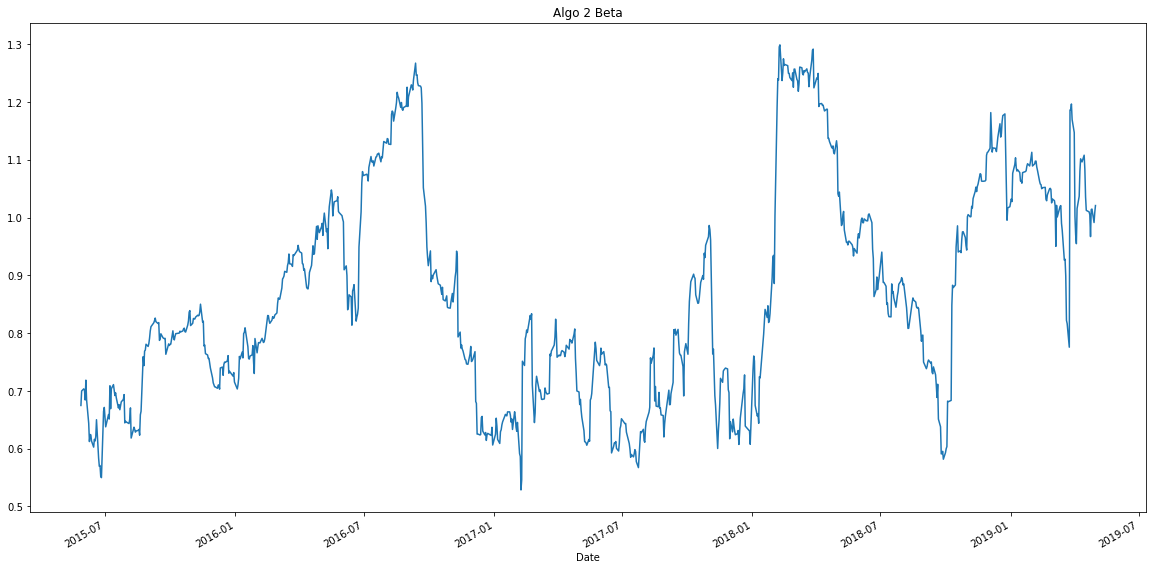

In [64]:
# Calculate beta of all daily returns 
# Computing beta
# Plot beta trend
algo_2_beta = algo_2_covariance / variance
algo_2_beta_plot = algo_2_beta.plot(title="Algo 2 Beta", figsize=(20, 10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Exponentialy Weighted Average'}, xlabel='Date'>

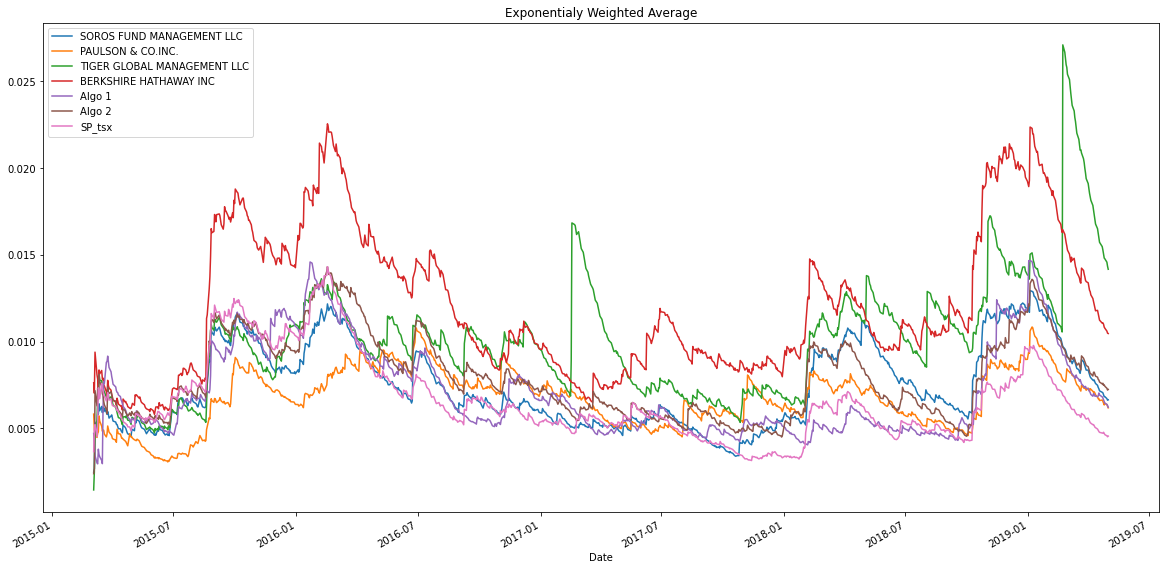

In [65]:
# Use `ewm` to calculate the rolling window
#'ewm'- exponentially weighted moving
# Calculate a rolling window using the exponentially weighted moving average. 
#rolling_window_ewma = combined_portfolios_df.rolling(window=100).mean().plot(figsize=(20, 10))
rolling_window_ewma = combined_portfolios_df.ewm(halflife=21, adjust=True).std().plot(title="Exponentialy Weighted Average", figsize=(20, 10))
rolling_window_ewma

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [66]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_portfolios_df.mean() * 252) / (combined_portfolios_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
SP_tsx                         0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

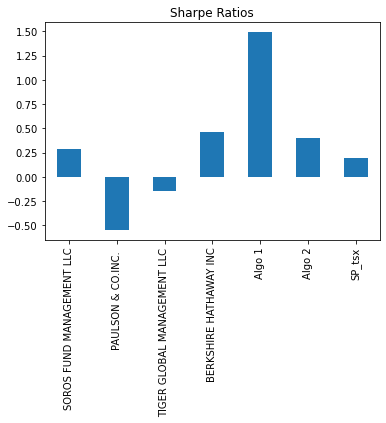

In [67]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [68]:
combined_portfolios_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_tsx
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


In [70]:
combined_portfolios_df.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_tsx
Date,,,,,,,
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702,-0.002944,-0.001570,-0.001183
2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833,0.000094,-0.007358,-0.004703


### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.
Write your answer here!
- Algo 1 is leading, outperforming others
- Berkshire Hathaway INC, Algo 2, SOROS Fund Management LLC, SP_tsx is doing well
- Paulson & CO.INC and TIGER GLOBAL MANAGEMENT LLC is not doing well
- My portfolio is doing comparitively well especially compared to Paulson and co Inc and Tiger Global Management LLC
- Algo 2 and my values- portfolio is comparable and might be highly correlated with each other


---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [80]:
# Reading data from 1st stock
# Read the first stock
amz_data = pd.read_csv(Path(r"C:\Users\ikili\Downloads\monu-virt-fin-11-2021-u-c-master\Homework\Week 3\Starter_Code\Amazon_data - Sheet1.csv"), index_col="Date", 
                           parse_dates = True, infer_datetime_format= True)
amz_data.rename(columns = {"Close":"Amazon"}, inplace = True)
amz_data.head()

,Amazon
Date,
2015-03-03 16:00:00,445.24
2015-03-04 16:00:00,442.84
2015-03-05 16:00:00,444.35
2015-03-06 16:00:00,436.72
2015-03-09 16:00:00,429.46


In [81]:
amz_data.tail()

,Amazon
Date,
2019-04-24 16:00:00,253.91
2019-04-25 16:00:00,253.23
2019-04-26 16:00:00,252.99
2019-04-29 16:00:00,253.15
2019-04-30 16:00:00,249.81


In [82]:
# Reading data from 2nd stock
fb_data = pd.read_csv(Path(r"C:\Users\ikili\Downloads\monu-virt-fin-11-2021-u-c-master\Homework\Week 3\Starter_Code\Facebook_data - Sheet1.csv"), index_col="Date", 
                           parse_dates = True, infer_datetime_format= True)
fb_data.rename(columns = {"Close":"Facebook"}, inplace = True)
fb_data.head()

,Facebook
Date,
2015-03-03 16:00:00,79.60
2015-03-04 16:00:00,80.90
2015-03-05 16:00:00,81.21
2015-03-06 16:00:00,80.01
2015-03-09 16:00:00,79.44


In [83]:
# Reading data from 3rd stock
Nike_data = pd.read_csv(Path(r"C:\Users\ikili\Downloads\monu-virt-fin-11-2021-u-c-master\Homework\Week 3\Starter_Code\Nike_data - Sheet1.csv"), index_col="Date", 
                           parse_dates = True, infer_datetime_format= True)
Nike_data.rename(columns = {"Close":"Nike"}, inplace = True)
Nike_data.head()

,Nike
Date,
2015-03-03 16:00:00,48.99
2015-03-04 16:00:00,48.76
2015-03-05 16:00:00,49.23
2015-03-06 16:00:00,48.46
2015-03-09 16:00:00,48.72


In [84]:
# Combine all stocks in a single DataFrame
combined_data = pd.concat([Nike_data,fb_data,amz_data], axis='columns', join='inner')
combined_data.head()

,Nike,Facebook,Amazon
Date,,,
2015-03-03 16:00:00,48.99,79.60,445.24
2015-03-04 16:00:00,48.76,80.90,442.84
2015-03-05 16:00:00,49.23,81.21,444.35
2015-03-06 16:00:00,48.46,80.01,436.72
2015-03-09 16:00:00,48.72,79.44,429.46


In [85]:
# Reset Date index
combined_data.index = combined_data.index.normalize()

In [86]:
# Drop Nulls
combined_data.dropna(inplace=True)

In [87]:
combined_data.head()

,Nike,Facebook,Amazon
Date,,,
2015-03-03,48.99,79.60,445.24
2015-03-04,48.76,80.90,442.84
2015-03-05,49.23,81.21,444.35
2015-03-06,48.46,80.01,436.72
2015-03-09,48.72,79.44,429.46


In [96]:
# Reorganize portfolio data by having a column per symbol
# Calculate weighted portfolio returns
#weights = [1/3, 1/3, 1/3]
#my_portfolio = combined_data.dot(weights)

# Calculate daily returns

# Drop NAs

# Display sample data
daily_returns = combined_data.pct_change()
daily_returns.dropna(inplace = True)
daily_returns.head()

,Nike,Facebook,Amazon
Date,,,
2015-03-04,-0.004695,0.016332,-0.005390
2015-03-05,0.009639,0.003832,0.003410
2015-03-06,-0.015641,-0.014777,-0.017171
2015-03-09,0.005365,-0.007124,-0.016624
2015-03-10,-0.009442,-0.023792,0.000699


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [97]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data
my_portfolio = daily_returns.dot(weights)




In [98]:
my_portfolio

Date
2015-03-04    0.002082
2015-03-05    0.005627
2015-03-06   -0.015863
2015-03-09   -0.006128
2015-03-10   -0.010845
                ...   
2019-04-24   -0.000409
2019-04-25    0.015476
2019-04-26   -0.000514
2019-04-29    0.005749
2019-04-30   -0.008384
Length: 1047, dtype: float64

In [100]:
my_p = pd.DataFrame(my_portfolio)
my_p.head()

,0
Date,
2015-03-04,0.002082
2015-03-05,0.005627
2015-03-06,-0.015863
2015-03-09,-0.006128
2015-03-10,-0.010845


In [102]:
my_p.columns

Int64Index([0], dtype='int64')

In [103]:
my_p.rename(columns = {0:"Values"}, inplace = True)
my_p.head()

,Values
Date,
2015-03-04,0.002082
2015-03-05,0.005627
2015-03-06,-0.015863
2015-03-09,-0.006128
2015-03-10,-0.010845


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [104]:
# Join your returns DataFrame to the original returns DataFrame
combined_3 = pd.concat([my_p, combined_portfolios_df], axis='columns', join='inner')
combined_3.dropna(inplace=True)
combined_3.sort_index()
combined_3.head()

,Values,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_tsx
Date,,,,,,,,
2015-03-04,0.002082,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.005627,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.015863,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,-0.006128,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
2015-03-10,-0.010845,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.014321


In [105]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_3.dropna(inplace = True)
combined_3.head()

,Values,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_tsx
Date,,,,,,,,
2015-03-04,0.002082,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.005627,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.015863,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,-0.006128,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
2015-03-10,-0.010845,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.014321


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [107]:
# Calculate the annualized `std`
combined_3.std()
annualized_variance_2 = (combined_3.var()*252)
annualized_std_2 = np.sqrt(annualized_variance_2)
annualized_std_2

Values                         0.186997
SOROS FUND MANAGEMENT LLC      0.124343
PAULSON & CO.INC.              0.110923
TIGER GLOBAL MANAGEMENT LLC    0.172883
BERKSHIRE HATHAWAY INC         0.203727
Algo 1                         0.120580
Algo 2                         0.132251
SP_tsx                         0.111666
dtype: float64

In [ ]:
combined_.rolling(window=21).std().plot(figsize=(15,8))

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Custom Beta'}, xlabel='Date'>

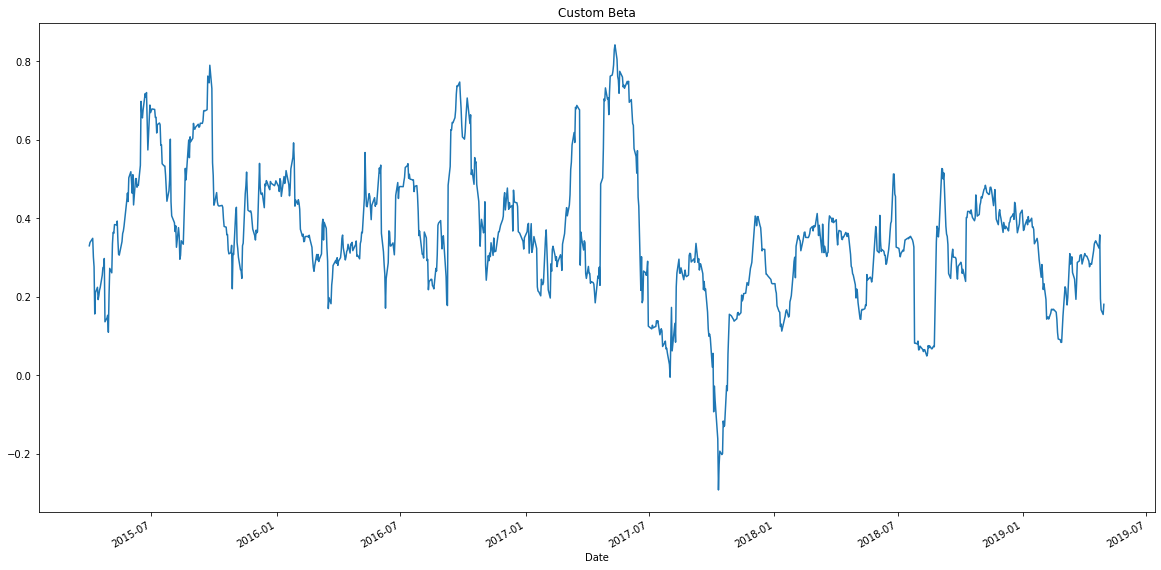

In [109]:
# Calculate rolling standard deviation
rolling_variance = combined_3['Values'].rolling(window=21).var()
rolling_covariance = combined_3['Values'].rolling(window=21).cov(combined_3['SP_tsx'])
rolling_beta = rolling_covariance / rolling_variance
# Plot rolling standard deviation
rolling_beta.plot(figsize=(20, 10), title='Custom Beta')



### Calculate and plot the correlation

In [110]:
# Calculate and plot the correlation
correlation = combined_3.corr()
correlation

,Values,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_tsx
Values,1.000000,0.684899,0.530763,0.456504,0.654304,0.310705,0.693989,0.632544
SOROS FUND MANAGEMENT LLC,0.684899,1.000000,0.697213,0.560731,0.750091,0.313787,0.826554,0.674055
PAULSON & CO.INC.,0.530763,0.697213,1.000000,0.433111,0.539889,0.266199,0.674220,0.486177
TIGER GLOBAL MANAGEMENT LLC,0.456504,0.560731,0.433111,1.000000,0.423308,0.161217,0.506383,0.440595
BERKSHIRE HATHAWAY INC,0.654304,0.750091,0.539889,0.423308,1.000000,0.289260,0.684485,0.556903
Algo 1,0.310705,0.313787,0.266199,0.161217,0.289260,1.000000,0.285471,0.310121
Algo 2,0.693989,0.826554,0.674220,0.506383,0.684485,0.285471,1.000000,0.737610
SP_tsx,0.632544,0.674055,0.486177,0.440595,0.556903,0.310121,0.737610,1.000000


<AxesSubplot:>

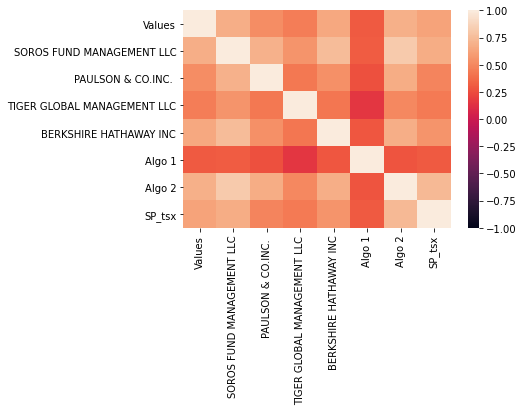

In [111]:
sns.heatmap(correlation, vmin=-1, vmax=1,)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [ ]:
# Calculate and plot Beta



<AxesSubplot:title={'center':'Rolling 60-Day Beta of my portfolio'}, xlabel='Date'>

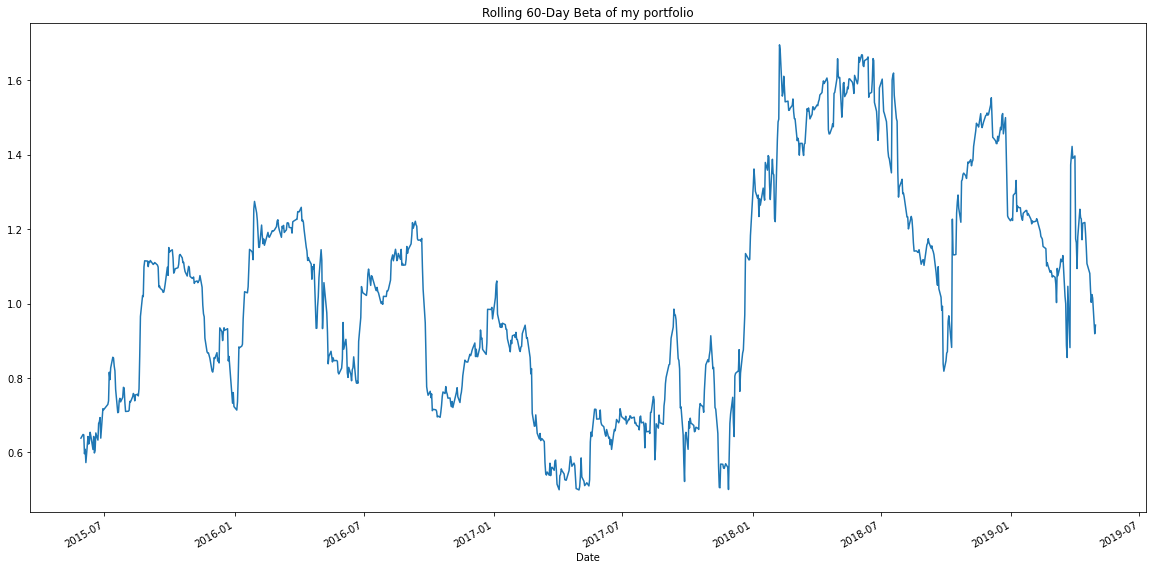

In [115]:
#do again
# Beta
#my portfolio-> values 
rolling_covariance = combined_3['Values'].rolling(window=60).cov(combined_3['SP_tsx'])
rolling_variance = combined_3['SP_tsx'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of my portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [113]:
# Calculate Annualized Sharpe Ratios
#Annulaized Sharpe Ratios
sharpe_ratios_all = (combined_3.mean() * 252) / ((combined_3).std() * np.sqrt(252))
sharpe_ratios_all

Values                         0.481179
SOROS FUND MANAGEMENT LLC      0.301110
PAULSON & CO.INC.             -0.534272
TIGER GLOBAL MANAGEMENT LLC   -0.132665
BERKSHIRE HATHAWAY INC         0.485005
Algo 1                         1.496819
Algo 2                         0.412780
SP_tsx                         0.225006
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

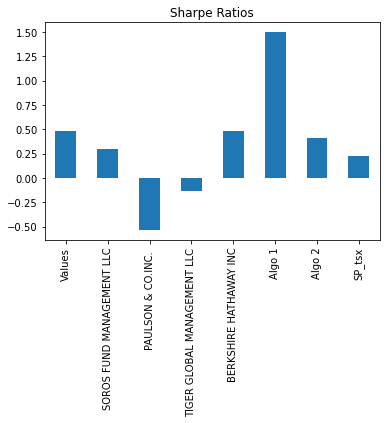

In [114]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_all.plot(kind="bar", title="Sharpe Ratios")

In [117]:
correlation_my_portfolio = combined_3.corr().loc[:,"Values"]
correlation_my_portfolio[
    correlation_my_portfolio==correlation_my_portfolio[correlation_my_portfolio<1].max()]

Algo 2    0.693989
Name: Values, dtype: float64

### How does your portfolio do?

Write your answer here!

- My portfolio is highly correlated to Algo 2
- My portfolio is doing comparitively well especially compared to Paulson and co Inc and Tiger Global Management LLC